<a href="https://colab.research.google.com/github/BryanBM8/SentimentAnalysis-MBTIClassification/blob/main/Copy_of_Salinan_dari_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk, csv, string, random, os, pickle
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.classify import NaiveBayesClassifier, accuracy
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
!pip install datasets
!pip install accelerate -U
!pip install transformers[torch]
import os
import pandas as pd
import numpy as np
import csv
import datasets
from sklearn.model_selection import train_test_split
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import seaborn as sns
from transformers import AutoTokenizer
from transformers import TrainingArguments
from transformers import AutoModelForSequenceClassification
from transformers import Trainer
from datasets import load_metric, load_dataset
from sklearn.metrics import f1_score


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# column_names = ['sentiment', 'id', 'date', 'query', 'name', 'text']
df = pd.read_csv('/content/drive/MyDrive/train.csv', encoding='latin1')
# df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(10)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,97929,440.0,223
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243,28470.0,104
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.0,3
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109


In [ ]:
# df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.shape


(27481, 10)

In [ ]:
df= df.dropna()

In [ ]:
print(df.isnull().sum())

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64


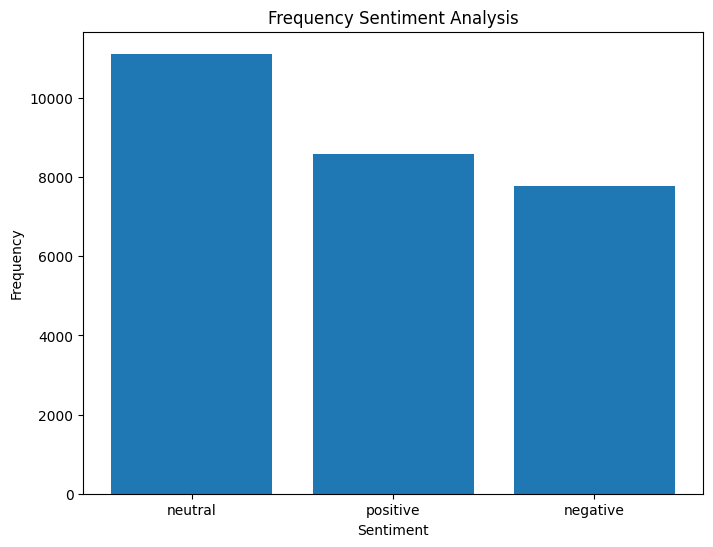

In [ ]:
label_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Frequency Sentiment Analysis')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


X = df[['text']]
y = df['sentiment']


target_size = 7500
label_counts = y.value_counts()


oversample_strategy = {label: target_size for label, count in label_counts.items() if count < target_size}

undersample_strategy = {label: target_size for label, count in label_counts.items() if count > target_size}


over_sampler = RandomOverSampler(sampling_strategy=oversample_strategy, random_state=22)
under_sampler = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=22)


X_over, y_over = over_sampler.fit_resample(X, y)


X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)




In [ ]:
balanced_df = pd.DataFrame({
    'text': np.ravel(X_balanced),
    'sentiment': y_balanced
})


print(balanced_df)

                                                    text sentiment
0                       in bucher`s class?! i cried too!  negative
1      Drinking and smoking is very bad.---but im gro...  negative
2      waiting for sleeping pills to kick in... gonna...  negative
3      chillin after a LOOOONNNGGG day of basketball ...  negative
4                 feeling sick. headache. bored. tireddd  negative
...                                                  ...       ...
22495        its funny, I didn`t even know it was there!  positive
22496  Found out that one great thing about living in...  positive
22497                    THANK YYYYYYYYYOOOOOOOOOOUUUUU!  positive
22498   aah. well, have a few friends over there. Jus...  positive
22499  http://tinyurl.com/ry9wap Hi!!! You are pretty...  positive

[22500 rows x 2 columns]


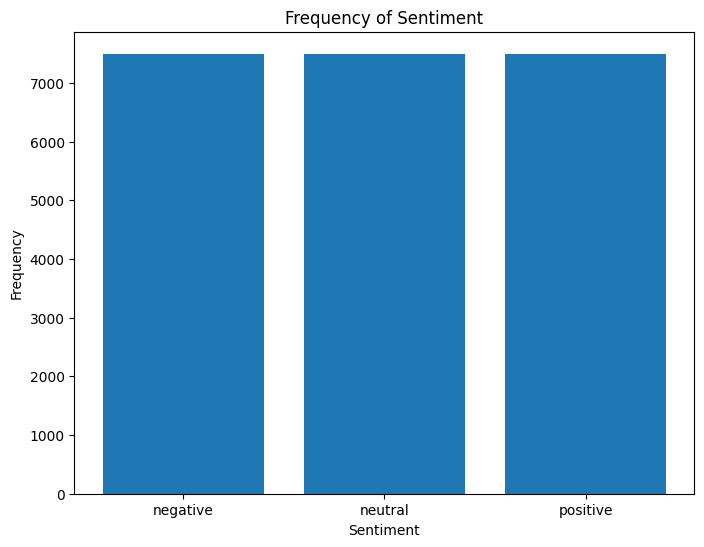

In [ ]:
label_counts = balanced_df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Frequency of Sentiment')
plt.show()

In [ ]:
mbti_labels = {
   'negative':0, 'positive':1, 'neutral':2
}

def transform_label(data):
  label = data['sentiment']
  num = mbti_labels[label]
  return num

balanced_df['sentiment'] = balanced_df.apply(transform_label, axis=1)

print(balanced_df['sentiment'])

0        0
1        0
2        0
3        0
4        0
        ..
22495    1
22496    1
22497    1
22498    1
22499    1
Name: sentiment, Length: 22500, dtype: int64


In [ ]:
print(balanced_df['text'])



0                         in bucher`s class?! i cried too!
1        Drinking and smoking is very bad.---but im gro...
2        waiting for sleeping pills to kick in... gonna...
3        chillin after a LOOOONNNGGG day of basketball ...
4                   feeling sick. headache. bored. tireddd
                               ...                        
22495          its funny, I didn`t even know it was there!
22496    Found out that one great thing about living in...
22497                      THANK YYYYYYYYYOOOOOOOOOOUUUUU!
22498     aah. well, have a few friends over there. Jus...
22499    http://tinyurl.com/ry9wap Hi!!! You are pretty...
Name: text, Length: 22500, dtype: object


In [ ]:
def combine_tweets(text):
    return text.replace('|||', ' ')

In [ ]:
balanced_df['text'] = balanced_df['text'].apply(combine_tweets)
print(balanced_df['text'])

0                         in bucher`s class?! i cried too!
1        Drinking and smoking is very bad.---but im gro...
2        waiting for sleeping pills to kick in... gonna...
3        chillin after a LOOOONNNGGG day of basketball ...
4                   feeling sick. headache. bored. tireddd
                               ...                        
22495          its funny, I didn`t even know it was there!
22496    Found out that one great thing about living in...
22497                      THANK YYYYYYYYYOOOOOOOOOOUUUUU!
22498     aah. well, have a few friends over there. Jus...
22499    http://tinyurl.com/ry9wap Hi!!! You are pretty...
Name: text, Length: 22500, dtype: object


In [ ]:
#Removes links, tags (@username), emojis, punctuation
def preprocess(text):
  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'\bhttps\S+\b', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  return text

balanced_df['text'] = balanced_df['text'].apply(preprocess)
print(balanced_df['text'])

0                             in buchers class i cried too
1         Drinking and smoking is very badbut im grown tho
2        waiting for sleeping pills to kick in gonna be...
3        chillin after a LOOOONNNGGG day of basketball ...
4                      feeling sick headache bored tireddd
                               ...                        
22495             its funny I didnt even know it was there
22496    Found out that one great thing about living in...
22497                       THANK YYYYYYYYYOOOOOOOOOOUUUUU
22498    aah well have a few friends over there Just wo...
22499    httptinyurlcomry9wap Hi You are pretty man I c...
Name: text, Length: 22500, dtype: object


In [ ]:
ENGLISH_STOPWORDS = stopwords.words('english')
PUNCTUATIONS = string.punctuation
LEMMATIZER = WordNetLemmatizer()

In [ ]:
# def preprocess_2(text):
#   text = word_tokenize(text)
#   text = [word for word in text if word not in ENGLISH_STOPWORDS]
#   text = [LEMMATIZER.lemmatize(word) for word in text]
#   text = [word for word in text if word not in string.punctuation]
#   text = [word for word in text if word.isalpha()]
#   return text
# balanced_df['text'] = balanced_df['text'].apply(preprocess_2)
# print(balanced_df['text'])
balanced_df = balanced_df.rename(columns={'sentiment': 'label'})
balanced_df = balanced_df.rename(columns={'tweets': 'text'})

train, eval = train_test_split(balanced_df,train_size=0.9,stratify=balanced_df['label'], random_state = 42)

print(train)
print(eval)
tokenizer=AutoTokenizer.from_pretrained('distilbert-base-cased')
from datasets import Dataset
def tokenize_data(data):
    tokenized_data = tokenizer(data['text'], padding='max_length', max_length=512, truncation=True)
    return tokenized_data



train_data = Dataset.from_pandas(train)
eval_data = Dataset.from_pandas(eval)
tokenized_train = train_data.map(tokenize_data, batched=True)
tokenized_eval = eval_data.map(tokenize_data, batched=True)


def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    f1 = f1_score(labels, predictions, average='weighted')
    return {"f1-score": f1}

trainargs = TrainingArguments(
    'MBTI_Classification_Distilbert',
    num_train_epochs=5,
    eval_strategy="epoch",
    save_strategy='epoch',
    load_best_model_at_end=True,
    push_to_hub=False,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

model_name = 'distilbert-base-cased'
num_labels = 3
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)


trainer = Trainer(
    model=model,
    args=trainargs,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_eval,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()
model.save_pretrained(r"C:\Users\jswan\Downloads\RM_Models_Tokenizer\Distilbert")
tokenizer.save_pretrained(r"C:\Users\jswan\Downloads\RM_Models_Tokenizer\Distilbert")
model = AutoModelForSequenceClassification.from_pretrained(r"C:\Users\jswan\Downloads\RM_Models_Tokenizer\Distilbert")
tokenizer = AutoTokenizer.from_pretrained(r"C:\Users\jswan\Downloads\RM_Models_Tokenizer\Distilbert")


from transformers import TrainingArguments

trainargs = TrainingArguments(
    output_dir='./results',
    per_device_eval_batch_size=16,
    logging_dir='./logs',
)


# def compute_metrics(p):
#     preds = p.predictions.argmax(-1)
#     return {"accuracy": (preds == p.label_ids).mean()}


# trainer = Trainer(
#     model=model,
#     args=trainargs,
#     eval_dataset=tokenized_eval,
#     tokenizer=tokenizer,
#     compute_metrics=compute_metrics,
# )

# # Evaluate the model
# eval_results = trainer.evaluate()

# # Print the results
# print(f"Evaluation results: {eval_results}")

                                                    text  label
497    I AM SUCH A CREEPER I feel disappointed becaus...      0
2106   if one people did any wrong the world blames a...      0
11971  _MJA I dont know who gon do the yelling cussin...      2
16721  Friday night has gone too quickly My bottles g...      1
7498                                             Too bad      0
...                                                  ...    ...
1433                            I miss my cousin so much      0
13175  warm and wet spent the day carpet cleaning the...      2
18702  Congrats Hughesy to you and Holly on the safe ...      1
12736  Well poop Looks like the office doesnt have th...      2
16420  do I discern a request for Hulu support excell...      1

[18000 rows x 2 columns]
                                                    text  label
12427         Im pass 400 updates Haha Tweet tweet tweet      2
197     yeah I didnt realize how bad it all was till now      0
16836         

Map:   0%|          | 0/18000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4500 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1-score
1,0.729200,0.586674,0.755504
2,0.385400,0.601602,0.760682
3,0.297900,0.693466,0.762043
4,0.283600,0.844566,0.762707


Epoch,Training Loss,Validation Loss,F1-score
1,0.729200,0.586674,0.755504
2,0.385400,0.601602,0.760682
3,0.297900,0.693466,0.762043
4,0.283600,0.844566,0.762707
5,0.184500,0.969657,0.762865


In [ ]:
def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    return {"accuracy": (preds == p.label_ids).mean()}

def compute_metrics2(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    f1 = f1_score(labels, predictions, average='weighted')
    return {"f1-score": f1}

trainer = Trainer(
    model=model,
    args=trainargs,
    eval_dataset=tokenized_eval,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics2,
)

# Evaluate the model
eval_results = trainer.evaluate()

# Print the results
print(f"Evaluation results: {eval_results}")

Evaluation results: {'eval_loss': 0.5866736173629761, 'eval_f1-score': 0.7555041805162024, 'eval_runtime': 79.5915, 'eval_samples_per_second': 56.539, 'eval_steps_per_second': 3.543}


In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import pandas as pd
import numpy as np


# Load the CSV file containing user input
user_input_df = pd.read_csv('KingJames.csv')  # Update path to the CSV file

# Assuming the CSV file has a column named 'text' containing the input text
user_input_df = user_input_df.rename(columns={'tweet': 'text'})

print(user_input_df.dtypes)
print(user_input_df.head(10))

# Tokenize the user input text
def tokenize_data2(data):
    tokenized_data = tokenizer(data['text'], padding='max_length', max_length=512, truncation=True)
    return tokenized_data

tokenized_dataset1 = Dataset.from_pandas(user_input_df)
tokenized_dataset2 = train_data.map(tokenize_data2, batched=True)

# Create a Trainer instance for prediction
trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
)



# Predict labels for the user input
preds = trainer.predict(tokenized_dataset2)



twitter_id     int64
date          object
text          object
dtype: object
            twitter_id                       date  \
0  1546388845494558723  2022-07-11 07:00:05+00:00   
1  1544418918323871751  2022-07-05 20:32:18+00:00   
2  1544093398411395073  2022-07-04 22:58:48+00:00   
3  1544061075427147777  2022-07-04 20:50:22+00:00   
4  1543640126110240772  2022-07-03 16:57:40+00:00   
5  1543249753823236096  2022-07-02 15:06:28+00:00   
6  1542600226967519233  2022-06-30 20:05:28+00:00   
7  1542555713259593729  2022-06-30 17:08:35+00:00   
8  1542524814056861700  2022-06-30 15:05:49+00:00   
9  1541908967735140354  2022-06-28 22:18:39+00:00   

                                                text  
0         b'@bellachef19 Nectarine \xf0\x9f\x8d\x91'  
1  b'@Jim_ICE \xf0\x9f\xa4\xa3\xf0\x9f\xa4\xa3\xf...  
2  b"\xf0\x9f\x94\xa5\xf0\x9f\x94\xa5\xf0\x9f\x94...  
3  b'\xf0\x9f\x98\xa4\xf0\x9f\x98\xa4\xf0\x9f\x98...  
4  b'I \xf0\x9f\x99\x8f\xf0\x9f\x8f\xbe for my ci...  
5  b"That

Map:   0%|          | 0/18000 [00:00<?, ? examples/s]

ValueError: Length of values (18000) does not match length of index (3233)

In [ ]:
# Add predicted labels to the user input DataFrame
print(len(tokenized_dataset2), len(user_input_df))
user_input_df['predicted_label'] = np.argmax(preds.predictions, axis=1)

# Display the DataFrame with predicted labels
print(user_input_df)


18000 3233


ValueError: Length of values (18000) does not match length of index (3233)